<a href="https://colab.research.google.com/github/pavithra-yasiru/self-organizing-maps/blob/main/som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Self-Organizing Maps

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning A-Z 2024: Neural Networks, AI & ChatGPT Prize/Part 4 - Self Organizing Maps/Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))

X = sc.fit_transform(X)

## Training the SOM

In [ ]:
pip install minisom

In [ ]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

som.random_weights_init(X)

som.train_random(data=X, num_iteration=100)

## Visualizing the results

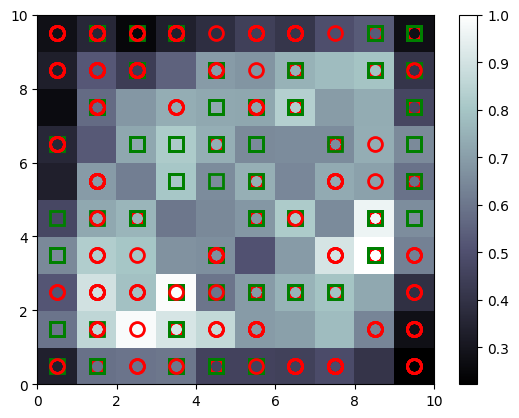

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

In [ ]:
mappings = som.win_map(X)
print(mappings)

defaultdict(<class 'list'>, {(1, 7): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
       0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
       0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.1155    , 0.        ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
       0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.98014648, 1.        , 0.30706767, 0.09821429, 0.5       ,
       0.15384615, 0.5       , 0.0877193 , 0.        , 0.        ,
       0.       

In [ ]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5663942e+07 1.0000000e+00 2.7830000e+01 1.0000000e+00 1.0000000e+00
  2.0000000e+00 8.0000000e+00 3.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.7600000e+02 5.3800000e+02]
 [1.5720529e+07 1.0000000e+00 2.1080000e+01 4.1250000e+00 1.0000000e+00
  3.0000000e+00 8.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.4000000e+02 1.0100000e+02]
 [1.5688210e+07 1.0000000e+00 3.8250000e+01 1.0125000e+01 1.0000000e+00
  4.0000000e+00 4.0000000e+00 1.2500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5692430e+07 1.0000000e+00 2.1170000e+01 2.5000000e-01 1.0000000e+00
  8.0000000e+00 8.0000000e+00 2.5000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 2.0500000e+02]
 [1.5643574e+07 1.0000000e+00 2.1170000e+01 8.7500000e-01 1.0000000e+00
  8.0000000e+00 8.0000000e+00 2.5000000e-01 0.0000000e+00 0.